In [3]:
%matplotlib notebook

from scipy.stats import  multivariate_normal
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(precision=2)


In [ ]:
x = np.linspace(0,5,50, endpoint= False)  # divide 0 to 5 in 10 equal parts
y = multivariate_normal.pdf(x, mean =2.5, cov = 0.5);
plt.plot(x,y)

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

<IPython.core.display.Javascript object>


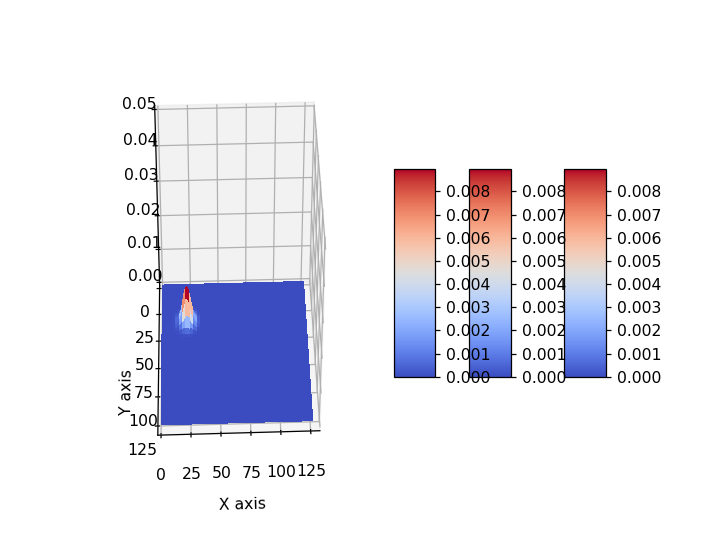

(128, 128) (128, 128) (80, 80) (128, 128, 2)


In [15]:

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
 

# rv = multivariate_normal([0.0,0.0],[[12,0.0] , [0.0,19]])
# plt.contourf(x,y,rv.pdf(pos))

# Make data.
X = np.arange(0, 128, 1)
Y = np.arange(0, 128, 1)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape+(2,))   # concatinate shape of x to make ( x.rows, x.cols, 2)
pos[:,:,0] = X;
pos[:,:,1] = Y;
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
rv = multivariate_normal([22,36],[[12,0.0] , [0.0,19]])
Z2 = rv.pdf(pos)
print(X.shape, Y.shape, Z.shape, pos.shape)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# # Customize the z axis.
ax.set_zlim(0.0 , 0.05)
ax.set_ylim(0,130)
ax.set_xlim(0,130)
ax.set_xlabel(' X axis')
ax.set_ylabel(' Y axis')
ax.invert_yaxis()
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [16]:
Z2.shape

(128, 128)

In [56]:
 def plot_gaussian( Z ):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    X = np.arange(0, 128, 1)
    Y = np.arange(0, 128, 1)
    X, Y = np.meshgrid(X, Y)
    
    pos = np.empty(X.shape+(2,))   # concatinate shape of x to make ( x.rows, x.cols, 2)
    pos[:,:,0] = X;
    pos[:,:,1] = Y;
    surf = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # # Customize the z axis.
    ax.set_zlim(0.0 , 0.05)
    ax.set_ylim(0,130)
    ax.set_xlim(0,130)
    ax.set_xlabel(' X axis')
    ax.set_ylabel(' Y axis')
    ax.invert_yaxis()
    ax.view_init(elev=140, azim=-88)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [42]:
def bbox_gaussian( bbox ):
    """
    receive a bounding box, and generate a gaussian distribution centered on the bounding box and with a 
    covariance matrix based on the width and height of the bounding box/. 
    Inputs : 
    --------
    bbox :  (y1, x1, y2, x2)

    Returns:
    --------
    bbox_g  grid mesh [image_height, image width] covering the distribution

    """
    print(bbox.shape)
    width  = bbox[6] - bbox[4]
    height = bbox[5] - bbox[3]
    cx     = bbox[4] + ( width  / 2.0)
    cy     = bbox[3] + ( height / 2.0)
    print('center is ({},{})'.format(cx,cy))
#     srtd_cpb_2 = np.column_stack((srtd_cpb[:, 0:2], cx,cy, width, height ))
    X = np.arange(0, 128, 1)
    Y = np.arange(0, 128, 1)
    X, Y = np.meshgrid(X, Y)
    pos = np.empty(X.shape+(2,))   # concatinate shape of x to make ( x.rows, x.cols, 2)
    pos[:,:,0] = X;
    pos[:,:,1] = Y;

    rv = multivariate_normal([cx,cy],[[12,0.0] , [0.0,19]])
    Zout  = rv.pdf(pos)
    Zout += Zin
    return Z

(128, 128)
(7,)
center is (20.29612732,84.484573365)
(128, 128)


<IPython.core.display.Javascript object>


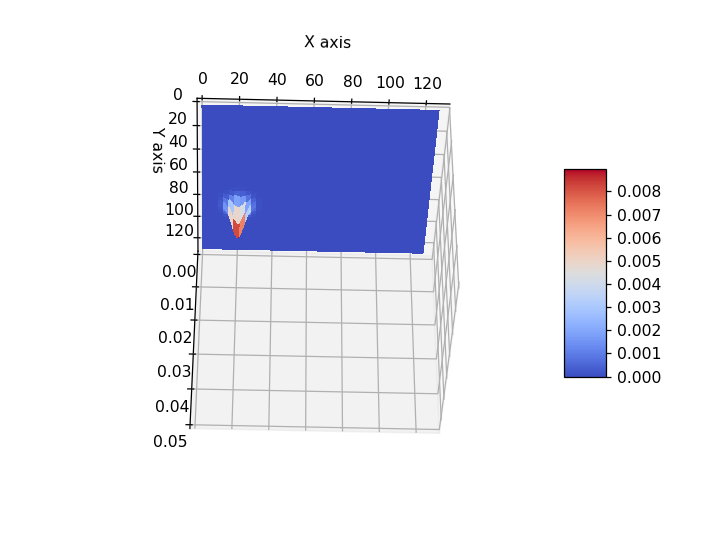

In [57]:
bbox = np.array([0,0,0,55.39196777 , 0.,         113.57717896,  40.59225464])
Zin = np.zeros((128,128))
print(Zin.shape)
Zout = bbox_gaussian(bbox, Zin)
print(Z.shape)
plot_gaussian(Z)
